# librosa test

librosa is a powerful module in python to process .wav files. We can use this module to get a .wav file's information.

In [61]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# basic
data, sample_rate = librosa.load("./212702_4.wav",sr=32700)
data
sample_rate # the default sample rate of librosa is 22050. Also we can use default or specified sample rate.

32700

In [62]:
# spectrogram
spectrogram = librosa.feature.melspectrogram(y=data,sr=sample_rate)
spectrogram.shape

(128, 128)

[[21.719738 25.609222 24.965149 ... 26.684921 23.047121 19.167006]
 [25.770485 23.978848 24.208645 ... 33.82955  25.722584 24.290752]
 [30.496624 31.067478 27.489395 ... 32.62716  33.64089  33.211872]
 ...
 [68.43479  71.782074 73.345024 ... 80.       75.90136  72.098236]
 [73.19808  76.91474  74.64624  ... 80.       76.38805  74.56865 ]
 [71.96706  77.60691  80.       ... 80.       80.       80.      ]]
(128, 128)


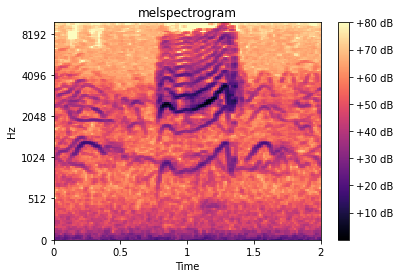

In [63]:
# plot the spectrogram
fig, ax = plt.subplots()
S_dB = -librosa.power_to_db(spectrogram, ref=np.max)
print(S_dB)
print(S_dB.shape)
img = librosa.display.specshow(S_dB,
                               x_axis='time',
                               y_axis='mel',
                               sr=sample_rate,
                               fmax=10000,
                               ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title="melspectrogram")
plt.show()

In [64]:
# MFCC (梅尔频率倒谱系数)
# mel频率分析基于人类听觉感知实验。只关注人类耳朵可以听到的频率分量
mfcc = librosa.feature.mfcc(S=-S_dB,sr=sample_rate,n_mfcc=40,dct_type=2)
print(mfcc)
print(mfcc.shape)

[[-607.76654    -596.9621     -593.2111     ... -621.05597
  -607.71716    -609.9967    ]
 [  68.39616      76.50142      75.93766    ...   74.82724
    78.33449      72.08603   ]
 [ -28.135607    -34.71855     -32.922302   ...  -24.325714
   -37.662754    -42.648605  ]
 ...
 [ -13.832163     -2.0515566     3.055415   ...   -0.9740952
    -4.677739     -2.86883   ]
 [   1.584537      4.299781     -0.72860956 ...   -1.199282
    -3.8673716    -7.3858643 ]
 [   7.6091876     2.0153618     2.4051027  ...    5.042744
     6.8208027     4.9211664 ]]
(40, 128)


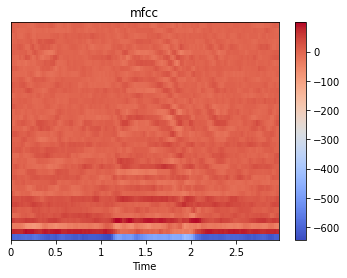

In [65]:
# plot the mfcc
fig,ax = plt.subplots()
img = librosa.display.specshow(mfcc,x_axis='time',ax=ax)
fig.colorbar(img,ax=ax)
ax.set(title='mfcc')
plt.show()